In [1]:
import os
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [2]:
dataset_path = "../Datasets/WineQT.csv"

random_state = 42
wandb_log = False
os.environ["WANDB_SILENT"] = "true"

hyperparameter_tuning = False

In [3]:
lr = 0.01
max_epochs = 15

In [4]:
def wandb_init(lr, max_epochs):
    if wandb_log:
        config = {
            "lr": lr, 
            "model_type": "Log_Reg",
            "num_epochs": max_epochs,
            "wandb_run_name": "bhav",
            "tags": ["P1",]
        }

        wandb.init(entity = "bhavberi",   # wandb username. (NOT REQUIRED ARG. ANYMORE, it fetches from initial login)
                project = "SMAI",        # wandb project name. New project will be created if given project is missing.
                config = config         # Config dict
                )
        wandb.run.name = f"P1_{config['lr']}_{config['num_epochs']}"
        print(wandb.run.name)

def wandb_finish():
    if wandb_log:
        wandb.finish()

In [5]:
dataset = pd.read_csv(dataset_path)
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [6]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
X = dataset.drop(columns=['quality']).to_numpy()
y = dataset['quality'].to_numpy()

num_classes = 11 # 0-10

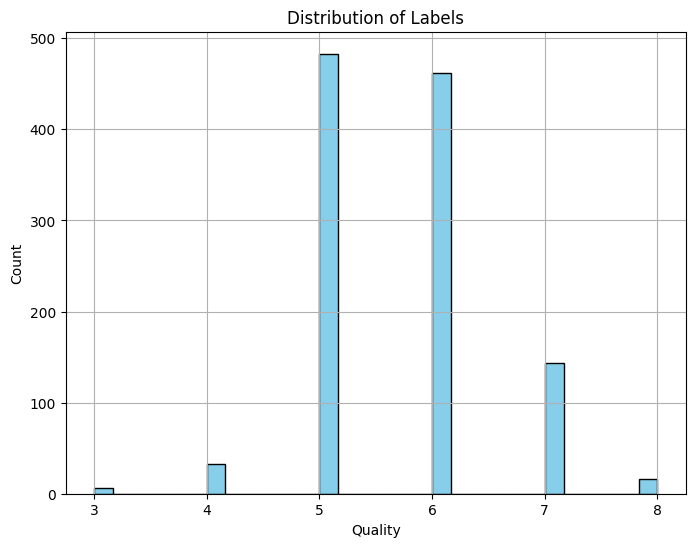

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Labels')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.grid(True)

plt.show()

In [9]:
# Count number of missing values in each column
missing_values_count = dataset.isnull().sum()

missing_values_count

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [10]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# To fill in data

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_validation.shape, y_validation.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (914, 12) (914,)
Validation set shape: (114, 12) (114,)
Test set shape: (115, 12) (115,)


In [12]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_validation_std = scaler.transform(X_validation)
X_test_std = scaler.transform(X_test)

In [13]:
# class LogisticRegression:
#     def __init__(self, learning_rate=0.01, num_epochs=1000):
#         self.learning_rate = learning_rate
#         self.num_epochs = num_epochs
#         self.weights = None
#         self.bias = None

#     def sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))
    
#     def fit(self, X, y, X_val, y_val):
#         num_samples, num_features = X.shape
#         self.weights = np.zeros(num_features)
#         self.bias = 0
#         train_loss = []
#         val_acc = []

#         for i in range(self.num_epochs):
#             y_predicted = self.sigmoid(np.dot(X, self.weights) + self.bias)

#             dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
#             db = (1 / num_samples) * np.sum(y_predicted - y)

#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db

#             loss = self.loss(y, y_predicted)
#             train_loss.append(loss)

#             y_predicted_val = self.predict(X_val)
#             val_acc.append(self.accuracy(y_val, y_predicted_val))

#             if i % 5 == 0:
#                 print(f'epoch {i} loss {loss} val_acc {val_acc[i]}')
        
#         return train_loss, val_acc
    
#     def predict(self, X):
#         y_predicted = self.sigmoid(np.dot(X, self.weights) + self.bias)
#         y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
#         return np.array(y_predicted_cls)
    
#     def loss(self, y_true, y_pred):
#         loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
#         return loss.mean()
    
#     def accuracy(self, y_true, y_pred):
#         accuracy = np.sum(y_true == y_pred) / len(y_true)
#         return accuracy
    
#     def evaluate(self, X, y):
#         y_pred = self.predict(X)
#         accuracy = self.accuracy(y, y_pred)
#         return accuracy

In [14]:
# class LogisticRegressionMulticlass:
#     def __init__(self, learning_rate=0.01, num_epochs=1000):
#         self.learning_rate = learning_rate
#         self.num_epochs = num_epochs
#         self.classes = range(num_classes)
#         self.models = {}

#     def fit(self, X, y, X_val, y_val):
#         val_accs = []
#         for class_label in self.classes:
#             binary_y = (y == class_label).astype(int)
#             model = LogisticRegression(learning_rate=self.learning_rate, num_epochs=self.num_epochs)
#             loss, val_acc = model.fit(X, binary_y, X_val, (y_val == class_label).astype(int))
#             self.models[class_label] = model

#             acc = model.accuracy((y_val == class_label).astype(int), model.predict(X_val))
#             print(f'class {class_label} val_acc {acc}')

#             val_accs.append(val_acc)
#         return val_accs
            
#     def predict(self, X):
#         predictions = np.zeros((X.shape[0], len(self.classes)))

#         for class_label, model in self.models.items():
#             predictions[:, class_label] = model.predict(X)

#         predicted_classes = np.argmax(predictions, axis=1)
#         return predicted_classes
    
#     def evaluate(self, X, y):
#         y_pred = self.predict(X)
#         accuracy = self.accuracy(y, y_pred)
#         return accuracy
    
#     def accuracy(self, y_true, y_pred):
#         accuracy = np.sum(y_true == y_pred) / len(y_true)
#         return accuracy
    
#     def plot_acc(self, val_accs):
#         # val_accs is an array of arrays with shape (num_classes, num_epochs)

#         val_accs = np.array(val_accs)
#         plt.figure(figsize=(8, 6))
#         plt.plot(val_accs.mean(axis=0), label='Average Validation Accuracy')
#         plt.title('Validation Accuracy')
#         plt.xlabel('Epoch')
#         plt.ylabel('Accuracy')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

In [15]:
class LogReg:
    def __init__(self, learning_rate=0.01, num_epochs=1000, print_every=10, wandb_log=False):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.classes = range(num_classes)
        self.weights = [None,] * num_classes
        self.bias = [None,] * num_classes
        self.print_every = print_every
        self.wandb_log = wandb_log

        self.val_acc = []
        self.train_acc = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    def loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred)) / len(y_true)
    
    def fit(self, X, y, X_val, y_val):
        num_samples, num_features = X.shape
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)
        train_loss = []
        self.val_acc = []
        self.train_acc = []

        enc = OneHotEncoder().fit(np.array([[i,] for i in range(num_classes)]))
        y_new = enc.transform(y.reshape(-1, 1)).toarray()
        
        for i in range(self.num_epochs):
            z = self.sigmoid(np.dot(X, self.weights) + self.bias[np.newaxis, :])
            y_predicted = self.softmax(z)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y_new))
            db = (1 / num_samples) * np.sum(y_predicted - y_new)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = self.loss(y_new, y_predicted)
            train_loss.append(loss)

            y_predicted_val = self.predict(X_val)
            self.val_acc.append(self.accuracy(y_val, y_predicted_val))
            y_predicted_train = self.predict(X)
            self.train_acc.append(self.accuracy(y, y_predicted_train))

            if self.print_every and (i+1) % self.print_every == 0:
                print(f'Epoch {i+1} loss: {loss:.4f}')
                print(f'Val Acc: {self.val_acc[-1]*100:.2f} Train Acc: {self.train_acc[-1]*100:.2f}')

            if self.wandb_log:
                wandb.log({"epoch": i+1,"train_loss": loss, "val_acc": self.val_acc[-1], "train_acc": self.train_acc[-1]})
        
        return train_loss
    
    def predict(self, X):
        y_predicted = self.softmax(np.dot(X, self.weights) + self.bias[np.newaxis, :])
        y_predicted_cls = np.argmax(y_predicted, axis=1)
        return y_predicted_cls
    
    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = self.accuracy(y, y_pred)
        return accuracy
    
    def plot_loss(self, train_loss):
        plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

    def plot_acc(self):
        plt.plot(range(1, len(self.val_acc) + 1), self.val_acc, label='Validation Accuracy')
        plt.plot(range(1, len(self.train_acc) + 1), self.train_acc, label='Train Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

Epoch 10 loss: 6.8140
Val Acc: 48.25 Train Acc: 51.86


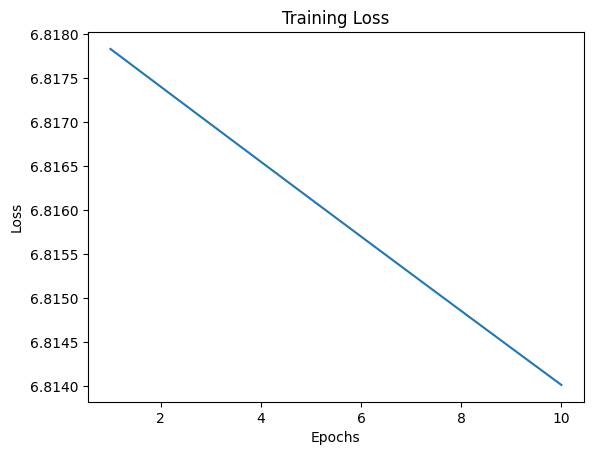

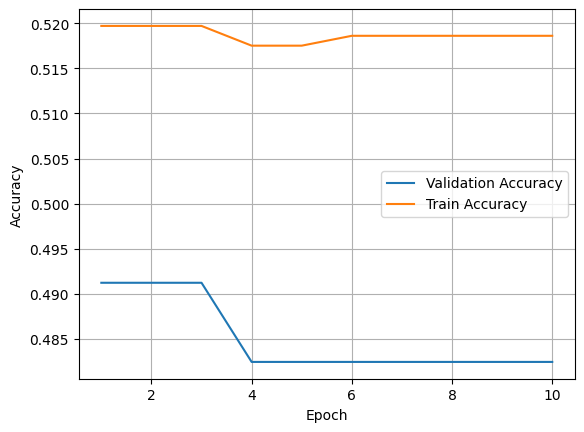

Test Accuracy 58.26086956521739


In [16]:
model = LogReg(learning_rate=0.01, num_epochs=10, wandb_log=False)
loss = model.fit(X_train_std, y_train, X_validation_std, y_validation)

model.plot_loss(loss)
model.plot_acc()

print("Test Accuracy",model.evaluate(X_test_std, y_test)*100)

In [17]:
best = [0, None, None]
if hyperparameter_tuning:
    for lr in [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]:
        for max_epochs in [5, 10, 15, 20, 30, 50, 100, 200, 300]:
            wandb_init(lr, max_epochs)
            model = LogReg(learning_rate=lr, num_epochs=max_epochs, print_every=None, wandb_log=wandb_log)
            loss = model.fit(X_train_std, y_train, X_validation_std, y_validation)
            
            val_acc = model.val_acc[-1]
            if val_acc > best[0]:
                best = [val_acc, lr, max_epochs]

            if wandb_log:
                wandb.log({"test_acc": model.evaluate(X_test_std, y_test)})
            
            wandb_finish()
else:
    best = [0.0, 0.001, 15] # best values from hyperparameter tuning

In [18]:
sklearn_model = LogisticRegression(max_iter=100)
sklearn_model.fit(X_train_std, y_train)
y_pred = sklearn_model.predict(X_test_std)
print("Test Accuracy",accuracy_score(y_test, y_pred)*100)

print(classification_report(y_test, y_pred, zero_division=0))

Test Accuracy 66.08695652173913
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.70      0.76      0.73        50
           6       0.63      0.61      0.62        44
           7       0.65      0.69      0.67        16
           8       0.00      0.00      0.00         2

    accuracy                           0.66       115
   macro avg       0.40      0.41      0.40       115
weighted avg       0.64      0.66      0.65       115



Epoch 10 loss: 6.8174
Val Acc: 49.12 Train Acc: 51.97


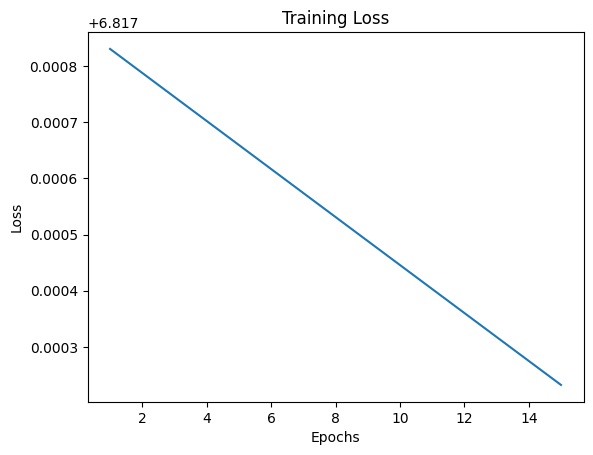

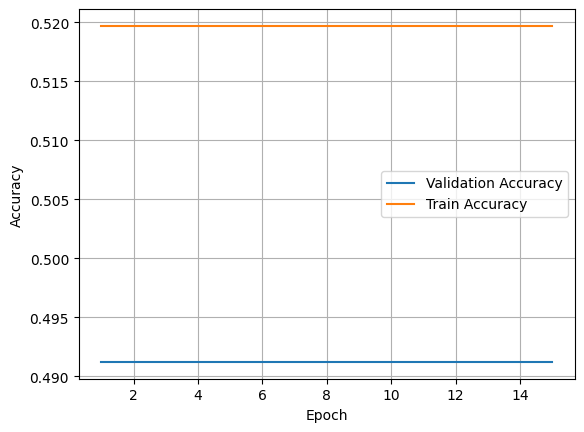

Test Accuracy 58.26086956521739


In [19]:
best_model = LogReg(learning_rate=best[1], num_epochs=best[2])
loss = best_model.fit(X_train_std, y_train, X_validation_std, y_validation)

best_model.plot_loss(loss)
best_model.plot_acc()

print("Test Accuracy",best_model.evaluate(X_test_std, y_test)*100)

In [20]:
print(classification_report(y_test, best_model.predict(X_test_std), zero_division=0))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.69      0.76      0.72        50
           6       0.73      0.36      0.48        44
           7       0.37      0.81      0.51        16
           8       0.00      0.00      0.00         2

    accuracy                           0.58       115
   macro avg       0.36      0.39      0.34       115
weighted avg       0.63      0.58      0.57       115

